<a href="https://colab.research.google.com/github/AndrewNikitin06/geometric_lib/blob/main/%D0%9F%D0%B72_237_%D0%9412_%D0%924_%D0%9D%D0%B8%D0%BA%D0%B8%D1%82%D0%B8%D0%BD_%D0%9F%D1%83%D0%B3%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.7 MB/s eta 0:00:00


In [ ]:
!pip install cvxopt

Метод	| Минимум	| Максимум	| Время		| Точка минимума	| Точка максимума
------------------------------------------------------------------------------------------
Pulp	| -4.50		| 10.00		| 0.0134с	| (-1.0, 2.5)	| (3.0, -4.0)
Scipy	| -3.00		| 6.00		| 0.0046с	| [0. 3.]	| [3. 0.]


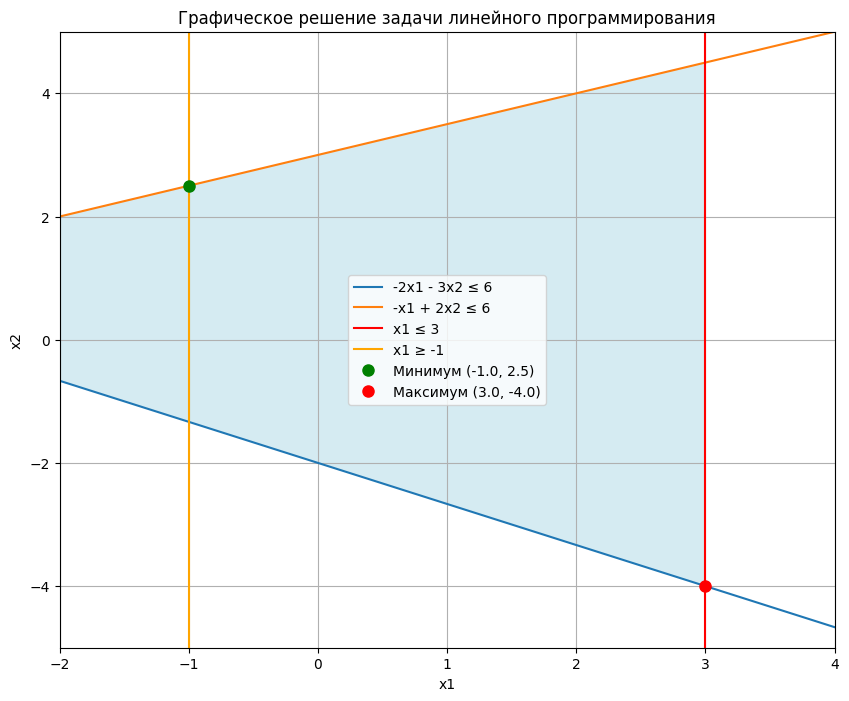


Проверка с приведенным ответом:
F_max = 2*3 - (-1)*(-4) = 2
Наш результат для максимума: 10.0
Совпадает: True


In [ ]:
import pulp
import numpy as np
from scipy.optimize import linprog
import time
import matplotlib.pyplot as plt

# Коэффициенты целевой функции
c_min = [2, -1]  # Для минимизации
c_max = [-2, 1]  # Для максимизации (умножили на -1)

# Ограничения в виде A_ub * x <= b_ub
A_ub = [
    [1, 0],   # x1 <= 3
    [-1, 0],  # -x1 <= 1 (эквивалентно x1 >= -1)
    [-2, -3], # -2x1 - 3x2 <= 6
    [-1, 2]   # -x1 + 2x2 <= 6
]
b_ub = [3, 1, 6, 6]

# Графическое построение
x1 = np.linspace(-2, 4, 400)
x2_line1 = (-2*x1 - 6)/3  # -2x1 - 3x2 = 6
x2_line2 = (x1 + 6)/2     # -x1 + 2x2 = 6

plt.figure(figsize=(10, 8))
plt.plot(x1, x2_line1, label='-2x1 - 3x2 ≤ 6')
plt.plot(x1, x2_line2, label='-x1 + 2x2 ≤ 6')
plt.axvline(x=3, color='red', label='x1 ≤ 3')
plt.axvline(x=-1, color='orange', label='x1 ≥ -1')
plt.xlim([-2, 4])
plt.ylim([-5, 5])

# Определение области допустимых решений
# Найдем точки пересечения для закрашивания области
# Точка A: пересечение x1=-1 и -2x1-3x2=6
x1_A = -1
x2_A = (-2*x1_A - 6)/3
# Точка B: пересечение x1=3 и -x1+2x2=6
x1_B = 3
x2_B = (x1_B + 6)/2
# Точка C: пересечение x1=3 и -2x1-3x2=6
x1_C = 3
x2_C = (-2*x1_C - 6)/3
# Точка D: пересечение -2x1-3x2=6 и -x1+2x2=6
# Решаем систему:
# -2x1 - 3x2 = 6
# -x1 + 2x2 = 6
A = np.array([[-2, -3], [-1, 2]])
b = np.array([6, 6])
x_D = np.linalg.solve(A, b)
x1_D, x2_D = x_D

# Закрашиваем область
vertices = np.array([[x1_A, x2_A], [x1_D, x2_D], [x1_B, x2_B], [x1_C, x2_C]])
plt.fill(vertices[:, 0], vertices[:, 1], 'lightblue', alpha=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()

# Решение методами
methods = []
results = []

# 1. Pulp
start = time.time()
prob_min = pulp.LpProblem("Min", pulp.LpMinimize)
x1_p = pulp.LpVariable('x1', lowBound=None)
x2_p = pulp.LpVariable('x2', lowBound=None)
prob_min += 2*x1_p - x2_p
prob_min += x1_p <= 3
prob_min += x1_p >= -1
prob_min += -2*x1_p - 3*x2_p <= 6
prob_min += -x1_p + 2*x2_p <= 6
prob_min.solve()
min_pulp = pulp.value(prob_min.objective)
x1_min_pulp = x1_p.varValue
x2_min_pulp = x2_p.varValue

prob_max = pulp.LpProblem("Max", pulp.LpMaximize)
x1_p = pulp.LpVariable('x1', lowBound=None)
x2_p = pulp.LpVariable('x2', lowBound=None)
prob_max += 2*x1_p - x2_p
prob_max += x1_p <= 3
prob_max += x1_p >= -1
prob_max += -2*x1_p - 3*x2_p <= 6
prob_max += -x1_p + 2*x2_p <= 6
prob_max.solve()
max_pulp = pulp.value(prob_max.objective)
x1_max_pulp = x1_p.varValue
x2_max_pulp = x2_p.varValue
pulp_time = time.time() - start

methods.append("Pulp")
results.append((min_pulp, max_pulp, pulp_time,
                (x1_min_pulp, x2_min_pulp), (x1_max_pulp, x2_max_pulp)))

# 2. Scipy
start = time.time()
res_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub)
res_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub)
scipy_time = time.time() - start

methods.append("Scipy")
results.append((res_min.fun, -res_max.fun, scipy_time,
                res_min.x, res_max.x))

# Отметка оптимальных точек на графике
plt.plot(x1_min_pulp, x2_min_pulp, 'go', markersize=8, label=f'Минимум ({x1_min_pulp}, {x2_min_pulp})')
plt.plot(x1_max_pulp, x2_max_pulp, 'ro', markersize=8, label=f'Максимум ({x1_max_pulp}, {x2_max_pulp})')
plt.legend()

# Сравнительная таблица
print("Метод\t| Минимум\t| Максимум\t| Время\t\t| Точка минимума\t| Точка максимума")
print("-" * 90)
for i in range(len(methods)):
    method = methods[i]
    min_val = results[i][0]
    max_val = results[i][1]
    time_val = results[i][2]
    min_point = results[i][3]
    max_point = results[i][4]

    print(f"{method}\t| {min_val:.2f}\t\t| {max_val:.2f}\t\t| {time_val:.4f}с\t| {min_point}\t| {max_point}")

plt.title('Графическое решение задачи линейного программирования')
plt.show()

# Проверка с приведенным ответом
print("\nПроверка с приведенным ответом:")
print(f"F_max = 2*3 - (-1)*(-4) = {2*3 - (-1)*(-4)}")
print(f"Наш результат для максимума: {max_pulp}")
print(f"Совпадает: {abs(max_pulp - 10) < 0.001}")